# Metropolis Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<ErrorbarContainer object of 3 artists>

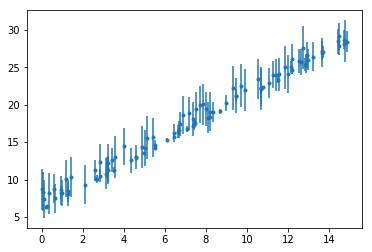

In [2]:
x_dat,y_dat,err_dat=np.loadtxt('datos.txt',unpack=True).T
plt.errorbar(x_dat, y_dat, err_dat, fmt='.')

In [3]:
a_st=2.
b_st=8.
sig_a=0.2
sig_b=0.5

theta_ini=(a_st,b_st)
sigma_ini=(sig_a,sig_b)

Nsamples=1000

Nchains=10

In [12]:
#Definimos una función que nos arroje un número random normal 

def random(center, desviation):
    return np.random.normal(center,desviation)

# Función a ajustar
def f(x,param):
    a,b=param
    return a*x+b


#Definimos el Likelihood
def lnlike(param):
    suma=0.0
    evalu=f(x_dat,param)
    for i in range (0,len(x_dat)):
        suma+=-0.5*(((evalu[i]-y_dat[i])/err_dat[i])**2)
    return suma

#Definimos la cadena de Markov
def MCMC(theta_ini,theta_prueba):
    p_ini=lnlike(theta_ini)
    p_prueba=lnlike(theta_prueba)
    frac=np.exp(p_prueba-p_ini) #esto porque hasta antes estabamos trabajando con el ln del likelihood, entonces la fracción de p_nuevo/p_ini, será la exponencial de la diferencia
    if (p_prueba>p_ini):
        return theta_prueba
    else:
        ran=np.random.uniform()
        if (frac>ran):
            return theta_prueba
        else:
            return theta_ini
    return
    

In [29]:
chains=[]

for i in range(Nchains):
    theta_ini=(random(theta_ini[0],sigma_ini[0]),random(theta_ini[1],sigma_ini[1]))
    for j in range(Nsamples):
        if j==0:
            chain=(theta_ini,lnlike(theta_ini))
        else:
            theta_prueba=np.array([random(theta_ini[0], sigma_ini[0]),random(theta_ini[1], sigma_ini[1])])
            theta_nuevo=MCMC(theta_ini,theta_prueba)
            chain=(theta_nuevo,lnlike(theta_nuevo))
            theta_ini=theta_nuevo
    if i==0:
        chains=chain
    else:
        chains=np.vstack((chains,chain))
            

/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp


ValueError: setting an array element with a sequence.

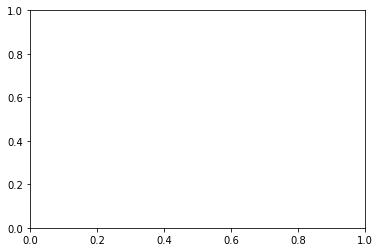

In [37]:
scatter(chains[:,0],chains[:,1],s=6)